In [1]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import f1_score,classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb

In [3]:
train_data=pd.read_csv("train_ctrUa4K.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.drop(labels="Loan_ID",inplace=True,axis=1)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Replacing na values

In [6]:
train_data["Gender"].fillna(value="Male",inplace=True)
train_data["Married"].fillna(value="Yes",inplace=True)
train_data["Dependents"].fillna(value="0",inplace=True)
train_data["Self_Employed"].fillna(value="No",inplace=True)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Encoding Cat Features

In [8]:
# get the category columns
category_columns=list(train_data.select_dtypes(include='object').columns)

In [9]:
category_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [10]:
#data encoding
train_data[category_columns[0]]          =train_data[category_columns[0]].replace({"Female" : 0 ,"Male" : 1})
train_data[category_columns[1]]          =train_data[category_columns[1]].replace({"No":1,"Yes":2})
train_data[category_columns[2]]          =train_data[category_columns[2]].replace({'0':0,'1':1,'2':2,'3+':3})
train_data[category_columns[3]]          =train_data[category_columns[3]].replace({"Graduate" : 1,"Not Graduate" : 2})
train_data[category_columns[4]]          =train_data[category_columns[4]].replace({"No":1,"Yes":2})
train_data[category_columns[5]]          =train_data[category_columns[5]].replace({'Urban':1,'Rural':2,'Semiurban':3})
train_data[category_columns[6]]          =train_data[category_columns[6]].replace({"Y":1,"N":0})

In [11]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,1,5849,0.0,NaN,360.0,1.0,1,1
1,1,2,1,1,1,4583,1508.0,128.0,360.0,1.0,2,0
2,1,2,0,1,2,3000,0.0,66.0,360.0,1.0,1,1
3,1,2,0,2,1,2583,2358.0,120.0,360.0,1.0,1,1
4,1,1,0,1,1,6000,0.0,141.0,360.0,1.0,1,1


# EDA (Exproratory Data Analysis)

## Numerical cols Distribution

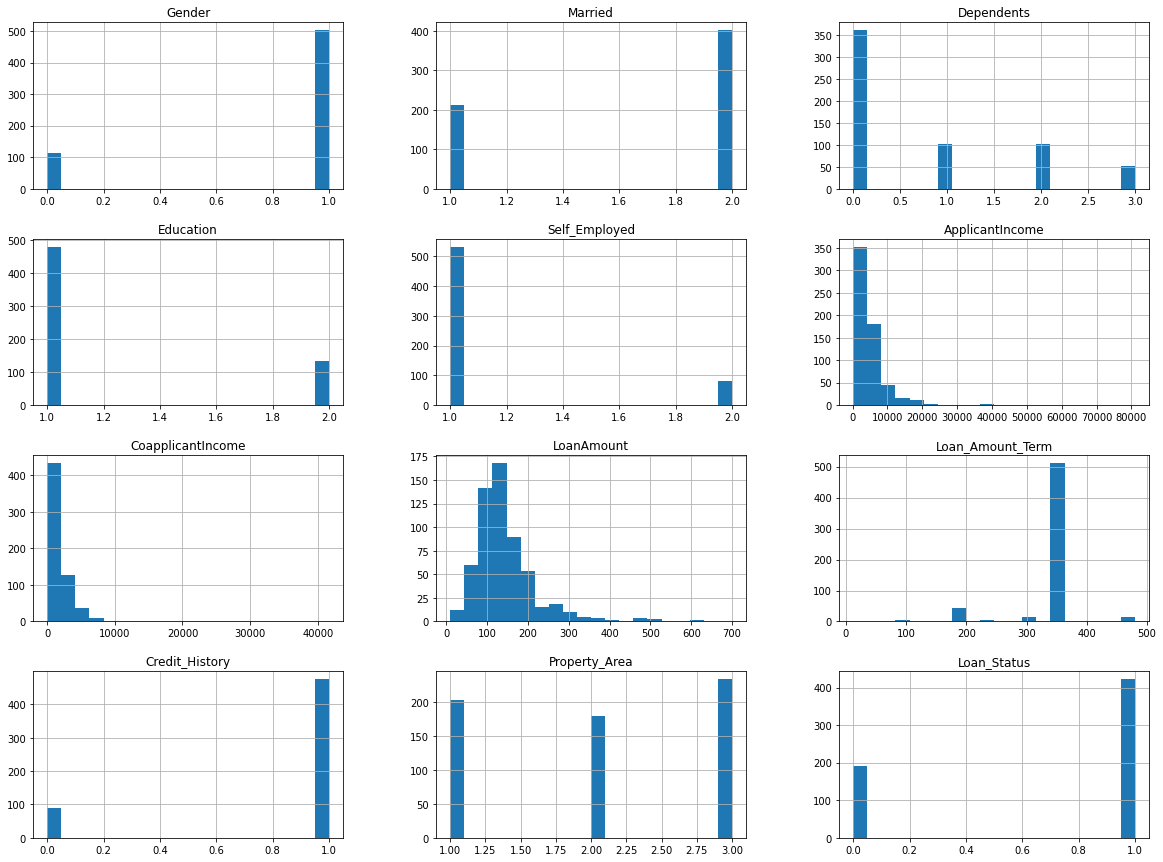

In [12]:
train_data.hist(bins=20,figsize=(20,15))
plt.show()

## Scatter plot

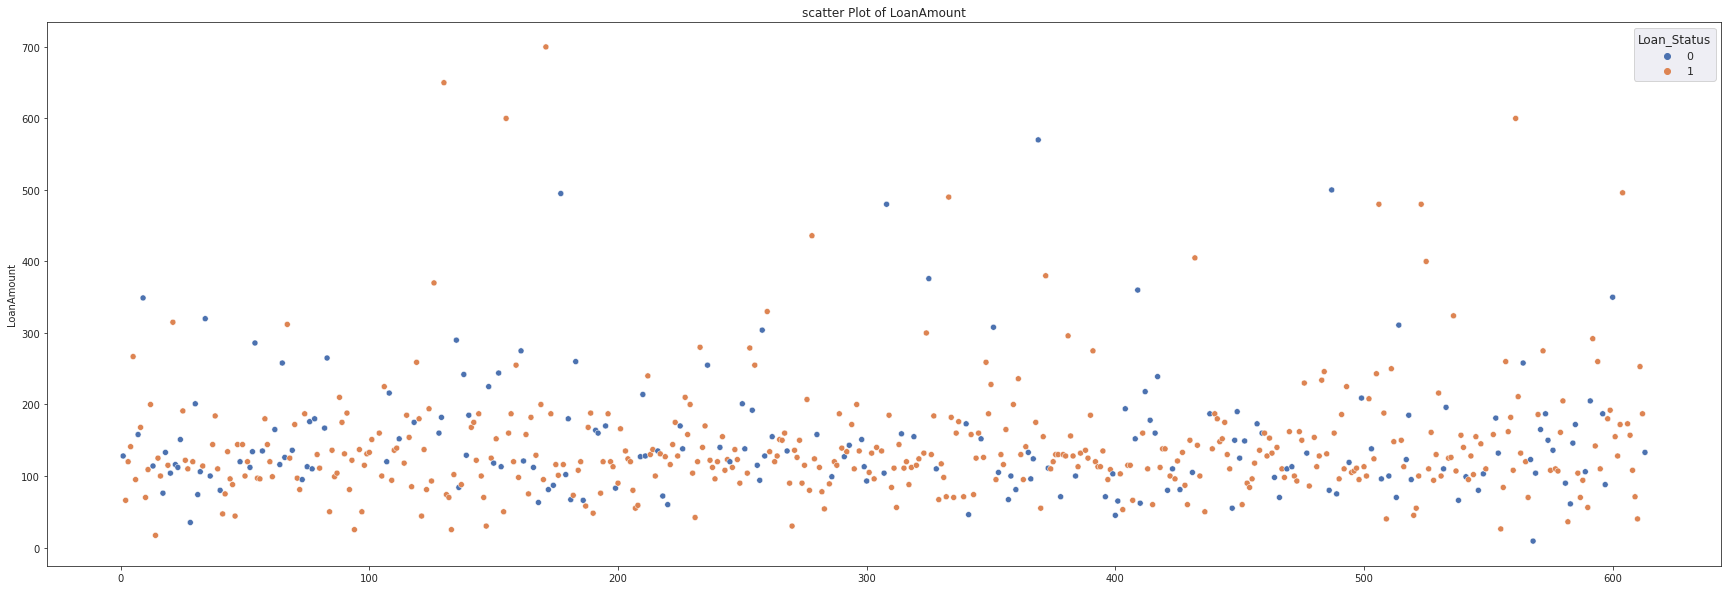

In [13]:
#Plot
sns.set_style("ticks")
fig,ax=plt.subplots()
fig.set_size_inches(30,10)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=train_data.index,y=train_data["LoanAmount"],hue=train_data['Loan_Status'])
plt.title("scatter Plot of LoanAmount");

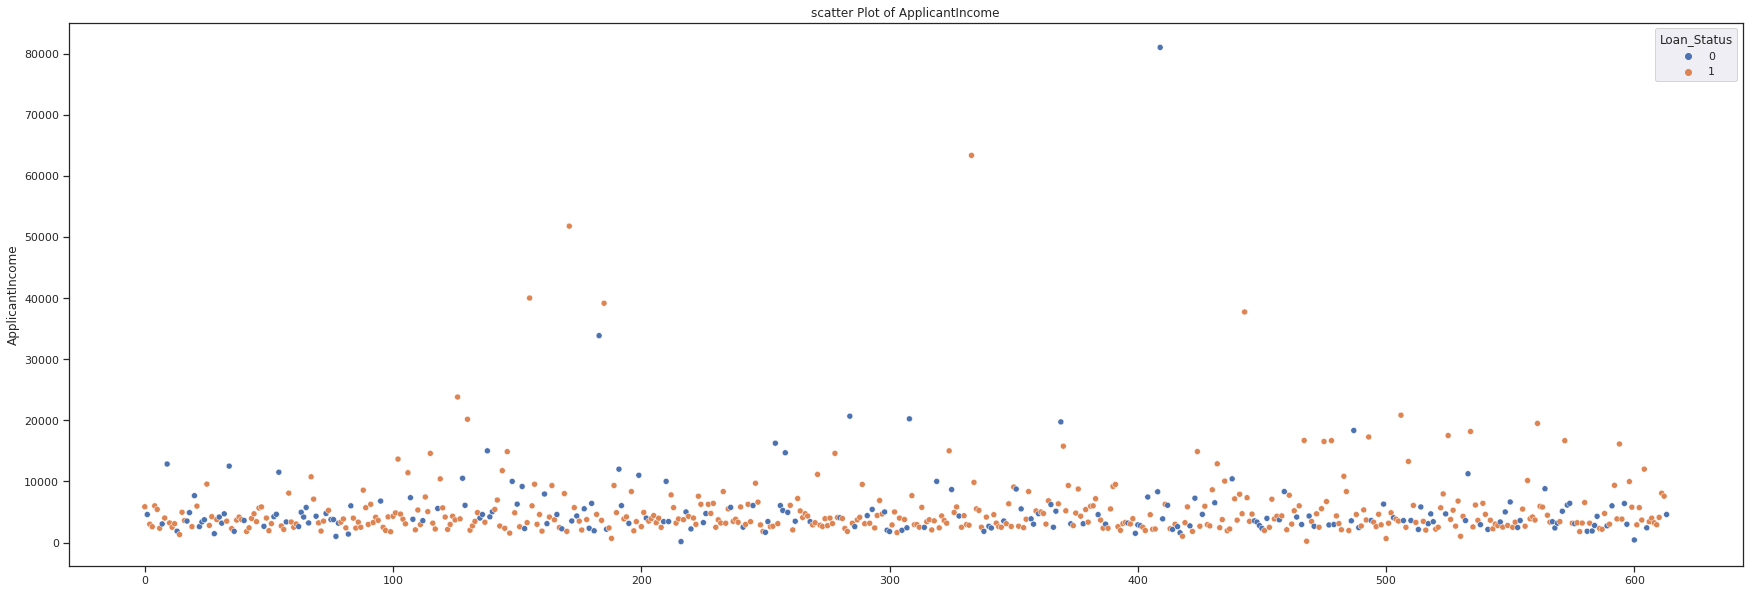

In [14]:
#Plot
sns.set_style("ticks")
fig,ax=plt.subplots()
fig.set_size_inches(30,10)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=train_data.index,y=train_data["ApplicantIncome"],hue=train_data['Loan_Status'])
plt.title("scatter Plot of ApplicantIncome");

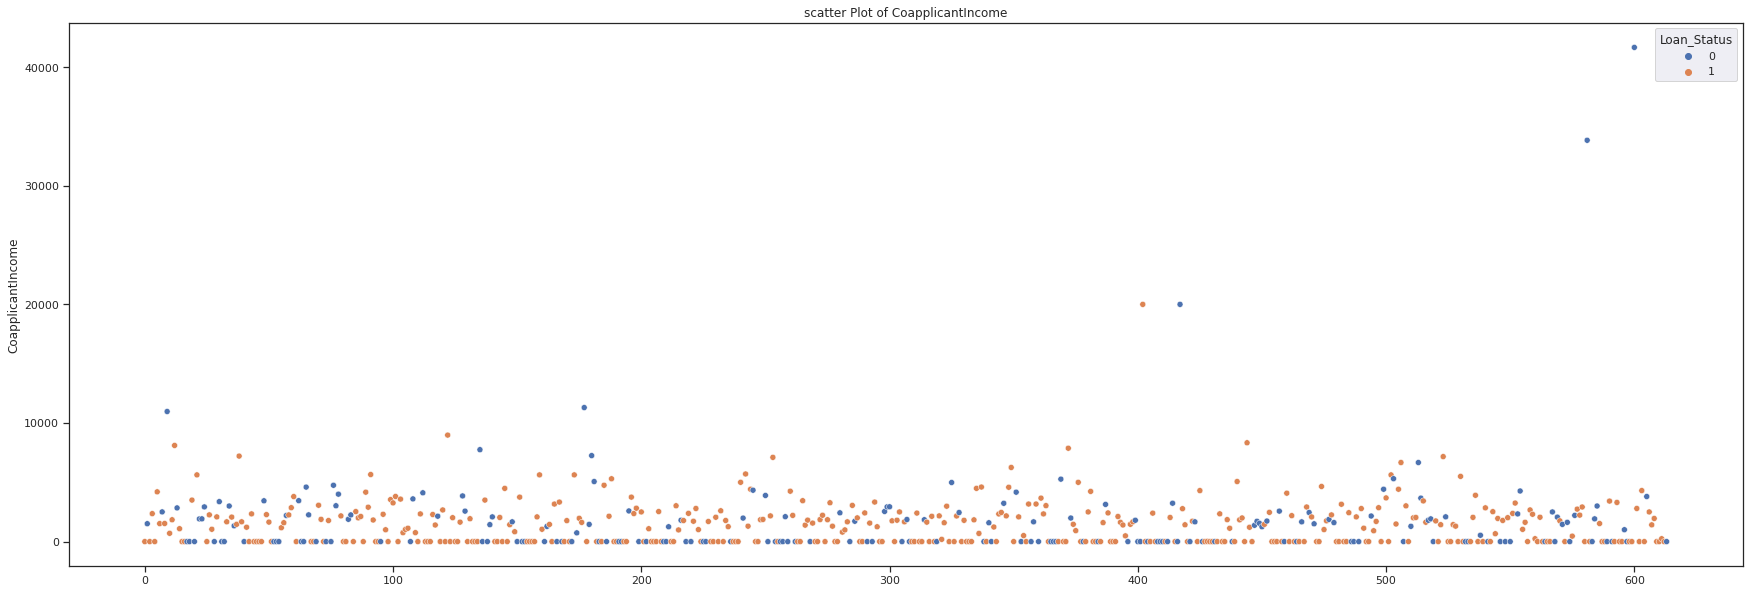

In [15]:
#Plot
sns.set_style("ticks")
fig,ax=plt.subplots()
fig.set_size_inches(30,10)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=train_data.index,y=train_data["CoapplicantIncome"],hue=train_data['Loan_Status'])
plt.title("scatter Plot of CoapplicantIncome");

## Plotting the distributions of all the features

<Figure size 432x288 with 0 Axes>

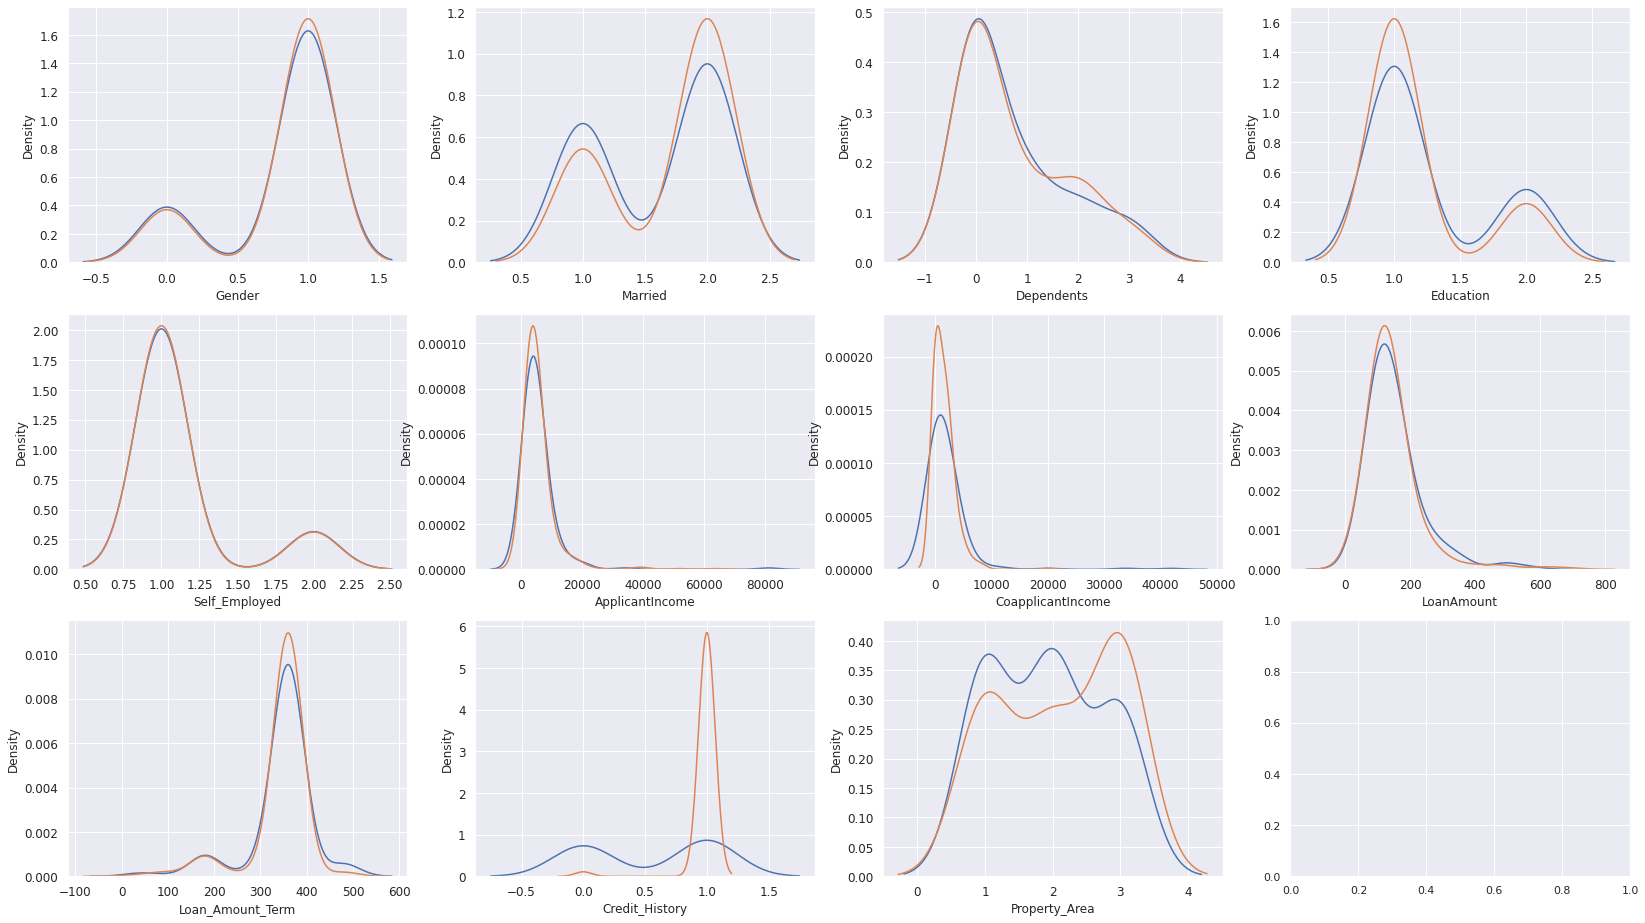

In [16]:
# Plotting the distributions of all the features
# Plotting numerical variable in displot to visualise the distribution
num_cols=train_data.select_dtypes(include='number')
var=list(train_data.columns.values)
var.remove("Loan_Status")
i=0
t0=train_data.loc[train_data["Loan_Status"]==0]
t1=train_data.loc[train_data["Loan_Status"]==1]

plt.figure()
fig,ax=plt.subplots(3,4,figsize=(28,16))

for feature in var:
    i+=1
    plt.subplot(3,4,i)
    sns.kdeplot(t0[feature],bw=0.5,label="0")
    sns.kdeplot(t1[feature],bw=0.5,label="1")
    plt.xlabel(feature,fontsize=12)
    locs,labels=plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    
plt.show();
    

In [17]:
# we will remove Gender,Self_employed
train_data.drop(labels=["Gender","Self_Employed"],axis=1,inplace=True)

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int64  
 1   Dependents         614 non-null    int64  
 2   Education          614 non-null    int64  
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         592 non-null    float64
 6   Loan_Amount_Term   600 non-null    float64
 7   Credit_History     564 non-null    float64
 8   Property_Area      614 non-null    int64  
 9   Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 48.1 KB


In [19]:
#Filling the Nan values with median
train_data["LoanAmount"].fillna(train_data["LoanAmount"].median(),inplace=True)

In [20]:
train_data["Credit_History"].fillna(1.0,inplace=True)
train_data["Loan_Amount_Term"].fillna(360.0,inplace=True)

# Binning ApplicantIncome , CoApplicantIncome, LoanAmount Into inter quartile Range

<Figure size 432x288 with 0 Axes>

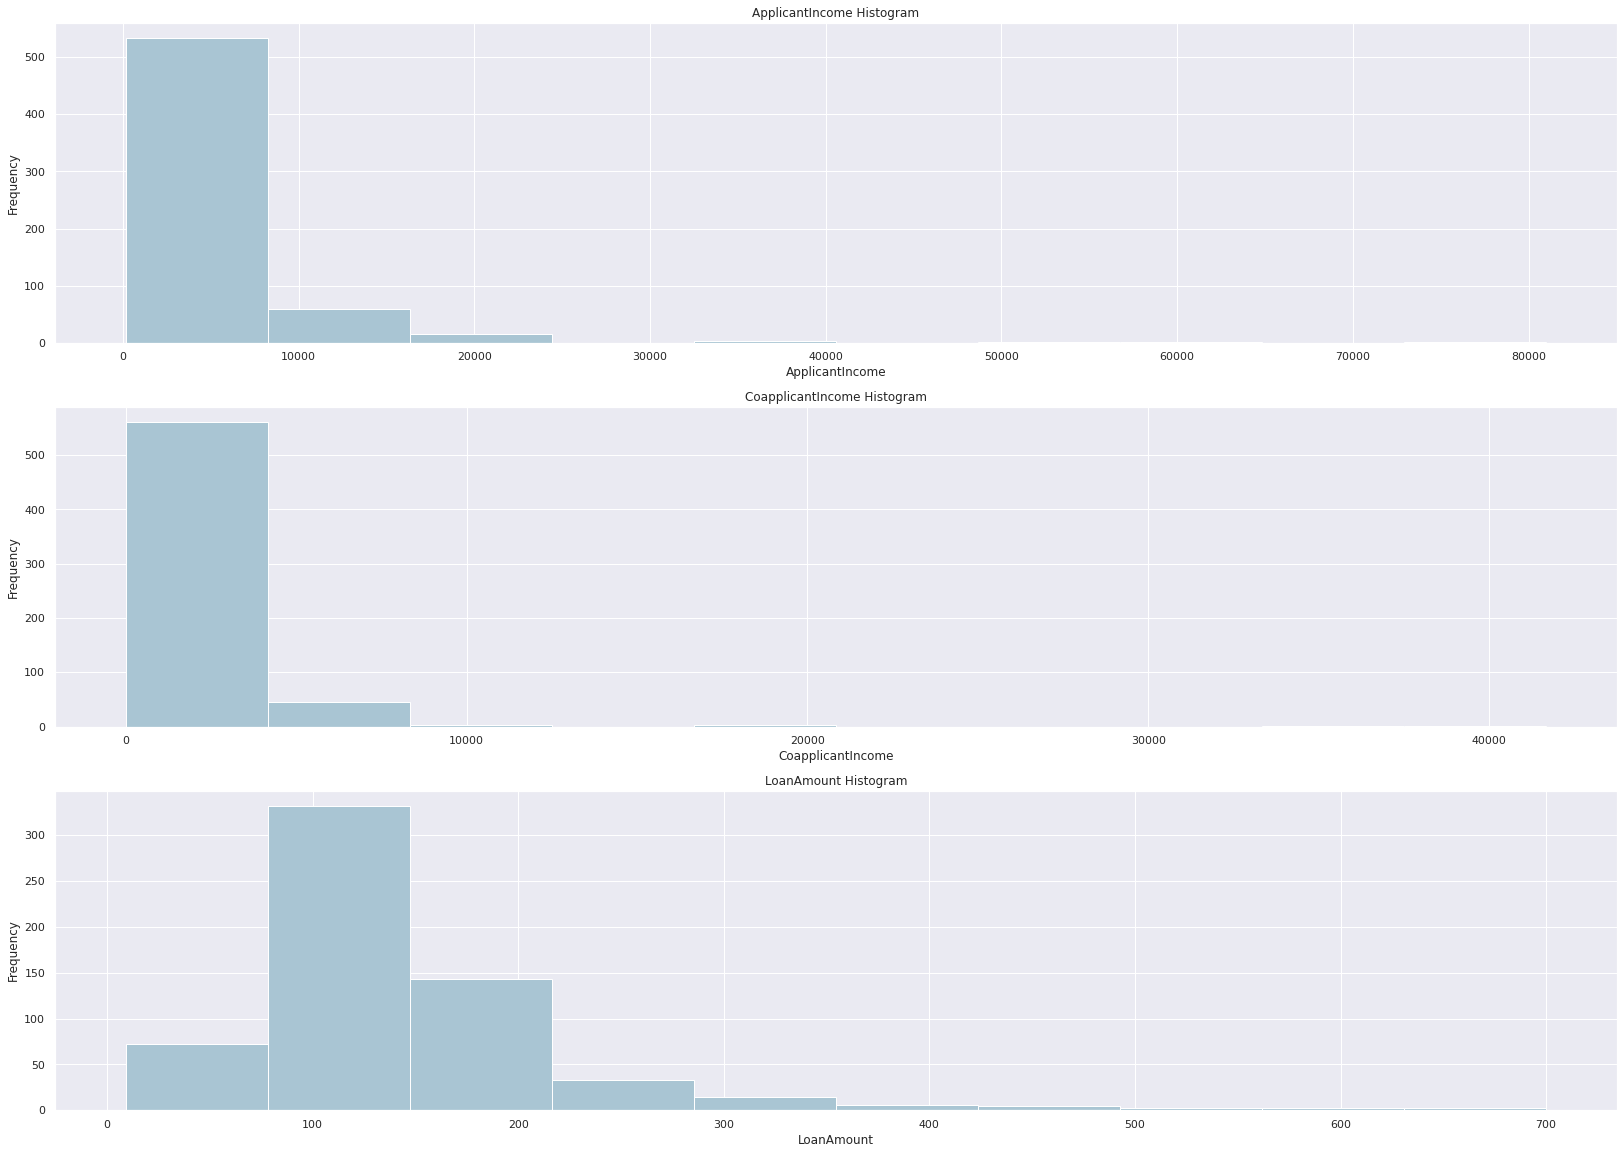

In [21]:
plt.figure()
fig,ax=plt.subplots(3,1,figsize=(28,20))
features=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
i=0
for feature in features:
    i+=1
    plt.subplot(3,1,i)
    train_data[feature].hist(color='#A9C5D3')
    plt.title(f"{feature} Histogram",fontsize=12)
    plt.xlabel(f"{feature}",fontsize=12)
    plt.ylabel("Frequency",fontsize=12)
    
plt.show();

In [22]:
quantiles_range=[0,.25,.5,.75,1.]
quantiles_applicantIncome=train_data["ApplicantIncome"].quantile(quantiles_range)
print(quantiles_applicantIncome)
print("================================")
quantiles_coapplicantIncome=train_data["CoapplicantIncome"].quantile(quantiles_range)
print(quantiles_coapplicantIncome)
print("================================")
quantiles_LoanAmount=train_data["LoanAmount"].quantile(quantiles_range)
print(quantiles_LoanAmount)

0.00      150.0
0.25     2877.5
0.50     3812.5
0.75     5795.0
1.00    81000.0
Name: ApplicantIncome, dtype: float64
0.00        0.00
0.25        0.00
0.50     1188.50
0.75     2297.25
1.00    41667.00
Name: CoapplicantIncome, dtype: float64
0.00      9.00
0.25    100.25
0.50    128.00
0.75    164.75
1.00    700.00
Name: LoanAmount, dtype: float64


<Figure size 432x288 with 0 Axes>

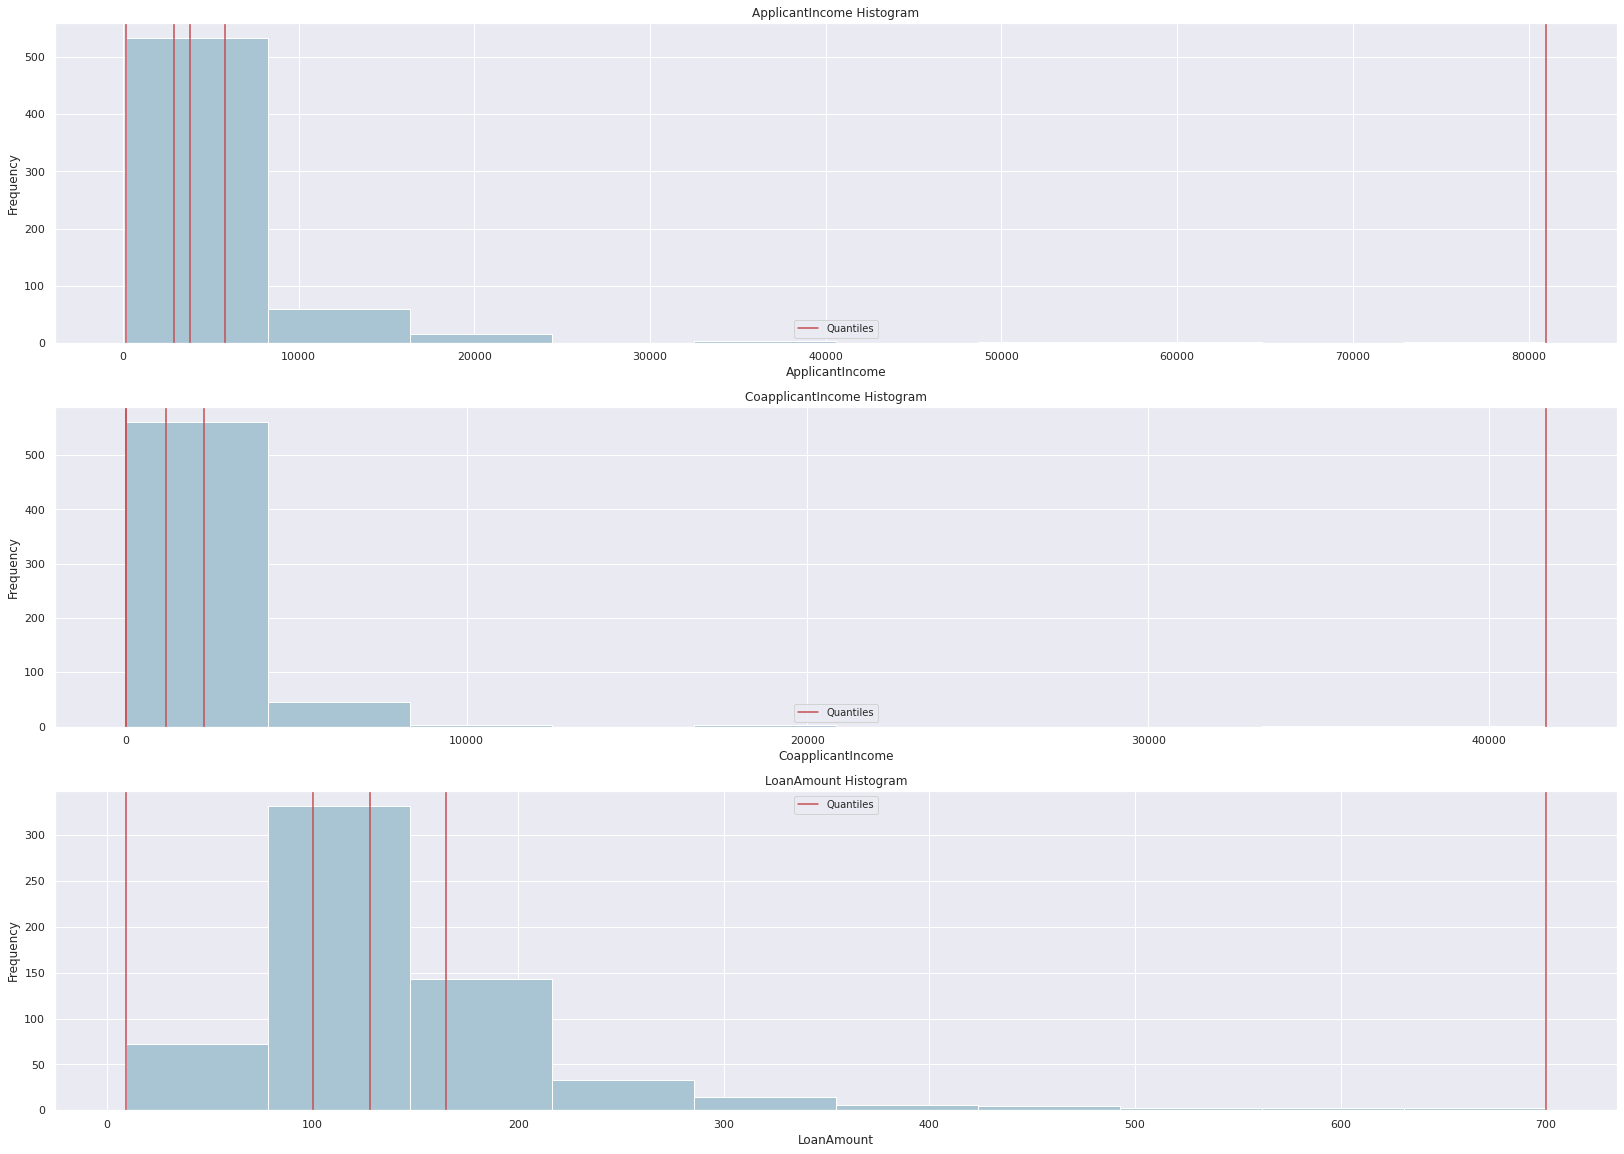

In [23]:
features=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
quantiles=[quantiles_applicantIncome,quantiles_coapplicantIncome,quantiles_LoanAmount]
plt.figure()
fig,ax=plt.subplots(3,1,figsize=(28,20))

i=0
for feature in features:
    i+=1
    plt.subplot(3,1,i)
    
    train_data[feature].hist(color='#A9C5D3')
    plt.title(f"{feature} Histogram",fontsize=12)
    plt.xlabel(f"{feature}",fontsize=12)
    plt.ylabel("Frequency",fontsize=12)
    quantile=quantiles[i-1]
    for quant in quantile:
        qvl=plt.axvline(quant,color="r")
    plt.legend([qvl], ['Quantiles'], fontsize=10)
        
    
plt.show();

In [24]:
quantile_labels = ['25', '50', '75', '100']
train_data["ApplicantIncome_quantile"]=pd.qcut(train_data["ApplicantIncome"],q=quantiles_range,labels=quantile_labels)
train_data["CoapplicantIncome_quantile"]=pd.qcut(train_data["CoapplicantIncome"],q=quantiles_range,labels=quantile_labels[1:],duplicates="drop")
train_data["LoanAmount_quantile"]=pd.qcut(train_data["LoanAmount"],q=quantiles_range,labels=quantile_labels)
train_data.iloc[4:16]

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_quantile,CoapplicantIncome_quantile,LoanAmount_quantile
4,1,0,1,6000,0.0,141.0,360.0,1.0,1,1,100,50,75
5,2,2,1,5417,4196.0,267.0,360.0,1.0,1,1,75,100,100
6,2,0,2,2333,1516.0,95.0,360.0,1.0,1,1,25,75,25
7,2,3,1,3036,2504.0,158.0,360.0,0.0,3,0,50,100,75
8,2,2,1,4006,1526.0,168.0,360.0,1.0,1,1,75,75,100
9,2,1,1,12841,10968.0,349.0,360.0,1.0,3,0,100,100,100
10,2,2,1,3200,700.0,70.0,360.0,1.0,1,1,50,50,25
11,2,2,1,2500,1840.0,109.0,360.0,1.0,1,1,25,75,50
12,2,2,1,3073,8106.0,200.0,360.0,1.0,1,1,50,100,100
13,1,0,1,1853,2840.0,114.0,360.0,1.0,2,0,25,100,50


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Married                     614 non-null    int64   
 1   Dependents                  614 non-null    int64   
 2   Education                   614 non-null    int64   
 3   ApplicantIncome             614 non-null    int64   
 4   CoapplicantIncome           614 non-null    float64 
 5   LoanAmount                  614 non-null    float64 
 6   Loan_Amount_Term            614 non-null    float64 
 7   Credit_History              614 non-null    float64 
 8   Property_Area               614 non-null    int64   
 9   Loan_Status                 614 non-null    int64   
 10  ApplicantIncome_quantile    614 non-null    category
 11  CoapplicantIncome_quantile  614 non-null    category
 12  LoanAmount_quantile         614 non-null    category
dtypes: category(3), floa

In [26]:
train_data["ApplicantIncome_quantile"]           =pd.to_numeric(train_data["ApplicantIncome_quantile"])
train_data["CoapplicantIncome_quantile"]         =pd.to_numeric(train_data["CoapplicantIncome_quantile"])
train_data["LoanAmount_quantile"]                =pd.to_numeric(train_data["LoanAmount_quantile"])

## Transformation

In [27]:
cols=list(train_data.columns)
cols.remove("Loan_Status")
cols

['Married',
 'Dependents',
 'Education',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'ApplicantIncome_quantile',
 'CoapplicantIncome_quantile',
 'LoanAmount_quantile']

In [28]:
std_scl=StandardScaler() #instance of preprocessing
train_scl=pd.DataFrame(std_scl.fit_transform(train_data[cols]),columns=cols)
train_scl["Loan_Status"]=train_data["Loan_Status"]
train_scl.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_quantile,CoapplicantIncome_quantile,LoanAmount_quantile,Loan_Status
0,-1.372089,-0.737806,-0.528362,0.072991,-0.554487,-0.211241,0.273231,0.411733,-1.250298,1.339896,-0.904713,-0.416275,1
1,0.728816,0.253470,-0.528362,-0.134412,-0.038732,-0.211241,0.273231,0.411733,-0.060092,0.446632,0.300263,-0.416275,0
2,0.728816,-0.737806,-0.528362,-0.393747,-0.554487,-0.948996,0.273231,0.411733,-1.250298,-0.446632,-0.904713,-1.309956,1
3,0.728816,-0.737806,1.892641,-0.462062,0.251980,-0.306435,0.273231,0.411733,-1.250298,-1.339896,1.505239,-0.416275,1
4,-1.372089,-0.737806,-0.528362,0.097728,-0.554487,-0.056551,0.273231,0.411733,-1.250298,1.339896,-0.904713,0.477406,1


In [29]:
train_scl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Married                     614 non-null    float64
 1   Dependents                  614 non-null    float64
 2   Education                   614 non-null    float64
 3   ApplicantIncome             614 non-null    float64
 4   CoapplicantIncome           614 non-null    float64
 5   LoanAmount                  614 non-null    float64
 6   Loan_Amount_Term            614 non-null    float64
 7   Credit_History              614 non-null    float64
 8   Property_Area               614 non-null    float64
 9   ApplicantIncome_quantile    614 non-null    float64
 10  CoapplicantIncome_quantile  614 non-null    float64
 11  LoanAmount_quantile         614 non-null    float64
 12  Loan_Status                 614 non-null    int64  
dtypes: float64(12), int64(1)
memory usa

## check Skewness

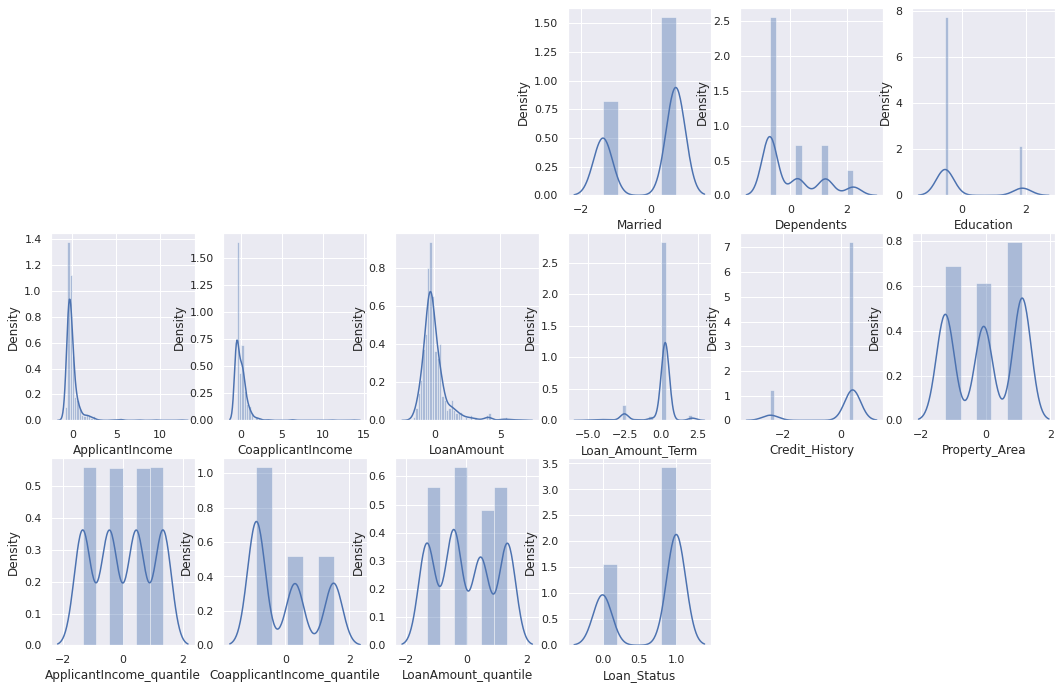

In [30]:
# plot the histogram of a variable from the dataset to see the skewness
var=train_scl.columns
plt.figure(figsize=(18,20))
for col in var:
    i+=1
    plt.subplot(5,6,i)
    sns.distplot(train_scl[col])
plt.show()

## Class analysis

In [31]:
classes=train_scl["Loan_Status"].value_counts()
status_0=round(classes[0]/train_scl['Loan_Status'].count()*100,2)
status_1=round(classes[1]/train_scl['Loan_Status'].count()*100,2)
status_0,status_1

(31.27, 68.73)

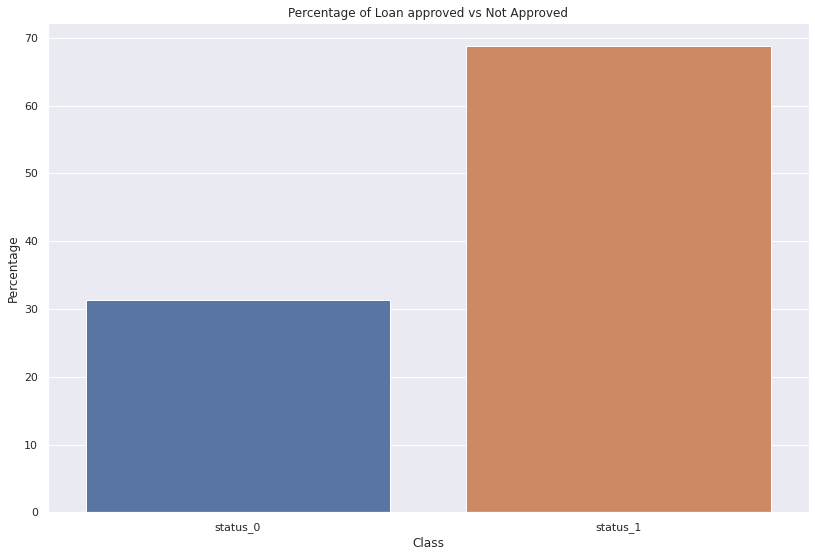

In [32]:
# Create BarPlot for number and Percentage of status_0 and status_1
plt.figure(figsize=(30,9))
plt.subplot(1,2,2)
status_percentage={"Class":["status_0","status_1"],"Percentage" : [status_0,status_1]}
df_status_percentage=pd.DataFrame(status_percentage)
sns.barplot(x="Class",y="Percentage",data=df_status_percentage)
plt.title('Percentage of Loan approved vs Not Approved')

plt.show()

## Preprocessing the Test Data

In [33]:
test_data=pd.read_csv("test_lAUu6dG.csv")
test_data.drop(labels="Loan_ID",inplace=True,axis=1)


test_data["Gender"].fillna(value="Male",inplace=True)
test_data["Married"].fillna(value="Yes",inplace=True)
test_data["Dependents"].fillna(value="0",inplace=True)
test_data["Self_Employed"].fillna(value="No",inplace=True)

test_data[category_columns[0]]          =test_data[category_columns[0]].replace({"Female" : 0 ,"Male" : 1})
test_data[category_columns[1]]          =test_data[category_columns[1]].replace({"No":1,"Yes":2})
test_data[category_columns[2]]          =test_data[category_columns[2]].replace({'0':0,'1':1,'2':2,'3+':3})
test_data[category_columns[3]]          =test_data[category_columns[3]].replace({"Graduate" : 1,"Not Graduate" : 2})
test_data[category_columns[4]]          =test_data[category_columns[4]].replace({"No":1,"Yes":2})
test_data[category_columns[5]]          =test_data[category_columns[5]].replace({'Urban':1,'Rural':2,'Semiurban':3})


test_data.drop(labels=["Gender","Self_Employed"],axis=1,inplace=True)

test_data["LoanAmount"].fillna(test_data["LoanAmount"].median(),inplace=True)
test_data["Credit_History"].fillna(1.0,inplace=True)
test_data["Loan_Amount_Term"].fillna(360.0,inplace=True)

quantile_labels = ['25', '50', '75', '100']
quantiles_range=[0,.25,.5,.75,1.]

test_data["ApplicantIncome_quantile"]=pd.qcut(test_data["ApplicantIncome"],q=quantiles_range,labels=quantile_labels)
test_data["CoapplicantIncome_quantile"]=pd.qcut(test_data["CoapplicantIncome"],q=quantiles_range,labels=quantile_labels[1:],duplicates="drop")
test_data["LoanAmount_quantile"]=pd.qcut(test_data["LoanAmount"],q=quantiles_range,labels=quantile_labels)


test_data["ApplicantIncome_quantile"]           =pd.to_numeric(test_data["ApplicantIncome_quantile"])
test_data["CoapplicantIncome_quantile"]         =pd.to_numeric(test_data["CoapplicantIncome_quantile"])
test_data["LoanAmount_quantile"]                =pd.to_numeric(test_data["LoanAmount_quantile"])


std_scl=StandardScaler()
test_scl=pd.DataFrame(std_scl.fit_transform(test_data[cols]),columns=cols)


# Model Building

In [39]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_score(y_test,y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score : {round(f1_score(y_test,y_pred)*100,2)}%")
    print(f"Classification Report : \n {classification_report(y_test,y_pred)}")
    

In [40]:
# ROC Curve function
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,
                                        drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(12,10))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [47]:
X=train_scl[cols]
y=train_scl["Loan_Status"]

In [51]:
# Spltting the into 80:20 train test size
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)


print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(491, 12)
(123, 12)
(491,)
(123,)


In [104]:
"""
# Create the parameter grid
# "max_depth":[50,70,100,120],
# "n_estimators" :[50,100,150,200,250,300],
# [0.001,0.003,0.005]
#        "subsample":[0.5,0.6,0.7],
param_grid={"learning_rate" : [0.002,0.05,0.003],
            "subsample":[0.5,0.6,0.7],
            "n_estimators" :[70,100],
            "max_depth":[70,50,100],
           "eval_metrics" :["auc"],
           'objective':['binary:logistic']}
# Instantiate the grid search model
xgb_model=XGBClassifier()
grid_search=GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=3,
                        n_jobs=-1,
                        verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)"""


'\n# Create the parameter grid\n# "max_depth":[50,70,100,120],\n# "n_estimators" :[50,100,150,200,250,300],\n# [0.001,0.003,0.005]\n#        "subsample":[0.5,0.6,0.7],\nparam_grid={"learning_rate" : [0.002,0.05,0.003],\n            "subsample":[0.5,0.6,0.7],\n            "n_estimators" :[70,100],\n            "max_depth":[70,50,100],\n           "eval_metrics" :["auc"],\n           \'objective\':[\'binary:logistic\']}\n# Instantiate the grid search model\nxgb_model=XGBClassifier()\ngrid_search=GridSearchCV(estimator=xgb_model,\n                        param_grid=param_grid,\n                        scoring="roc_auc",\n                        cv=3,\n                        n_jobs=-1,\n                        verbose=2)\n\n# Fit the grid search to the data\ngrid_search.fit(X_train,y_train)'

In [94]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ",grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.7887635756056809
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metrics='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=70, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [95]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eval_metrics,param_learning_rate,param_max_depth,param_n_estimators,param_objective,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,70.734067,10.534100,0.012140,0.011232,auc,0.02,70,100,binary:logistic,0.5,"{'eval_metrics': 'auc', 'learning_rate': 0.02,...",0.803509,0.779474,0.762084,0.781689,0.016984,4
1,41.414172,15.981005,0.013459,0.007836,auc,0.02,70,100,binary:logistic,0.6,"{'eval_metrics': 'auc', 'learning_rate': 0.02,...",0.811053,0.781404,0.757966,0.783474,0.021722,2
2,36.733567,15.099619,0.032420,0.030368,auc,0.02,70,100,binary:logistic,0.7,"{'eval_metrics': 'auc', 'learning_rate': 0.02,...",0.800526,0.777719,0.762442,0.780229,0.015649,5
3,37.062447,14.924255,0.070352,0.006413,auc,0.05,70,100,binary:logistic,0.5,"{'eval_metrics': 'auc', 'learning_rate': 0.05,...",0.803509,0.783333,0.779449,0.788764,0.010546,1
4,76.655557,19.368331,0.055838,0.016238,auc,0.05,70,100,binary:logistic,0.6,"{'eval_metrics': 'auc', 'learning_rate': 0.05,...",0.807895,0.775439,0.766201,0.783178,0.017879,3
5,84.131318,9.317625,0.048177,0.019746,auc,0.05,70,100,binary:logistic,0.7,"{'eval_metrics': 'auc', 'learning_rate': 0.05,...",0.791930,0.773684,0.758503,0.774706,0.013665,6
6,73.828645,11.386512,0.057240,0.009284,auc,0.2,70,100,binary:logistic,0.5,"{'eval_metrics': 'auc', 'learning_rate': 0.2, ...",0.757368,0.770000,0.749373,0.758914,0.008491,9
7,70.587649,16.471363,0.068682,0.025128,auc,0.2,70,100,binary:logistic,0.6,"{'eval_metrics': 'auc', 'learning_rate': 0.2, ...",0.758246,0.770526,0.752417,0.760396,0.007548,8
8,32.034965,12.863214,0.025753,0.023834,auc,0.2,70,100,binary:logistic,0.7,"{'eval_metrics': 'auc', 'learning_rate': 0.2, ...",0.769298,0.754561,0.766380,0.763413,0.006372,7


In [96]:
grid_search.best_params_

{'eval_metrics': 'auc',
 'learning_rate': 0.05,
 'max_depth': 70,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'subsample': 0.5}

{'eval_metrics': 'auc',
 'learning_rate': 0.05,
 'max_depth': 70,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'subsample': 0.5}

In [98]:
# Model with optimal hyperparameters
xg_model_opt=XGBClassifier(eval_metrics='auc',
  learning_rate =  0.05,
 max_depth = 70,
 n_estimators = 100,
 objective = 'binary:logistic',
 subsample = 0.5)
xg_model_opt.fit(X_train,y_train)


[20:11:28] WARNING: ../src/learner.cc:573: 
Parameters: { "eval_metrics" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:11:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metrics='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=70, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [99]:
# Predictions on the val set
y_val_pred=xg_model_opt.predict(X_val)
display_score(y_val,y_val_pred)

F1 Score : 85.08%
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123



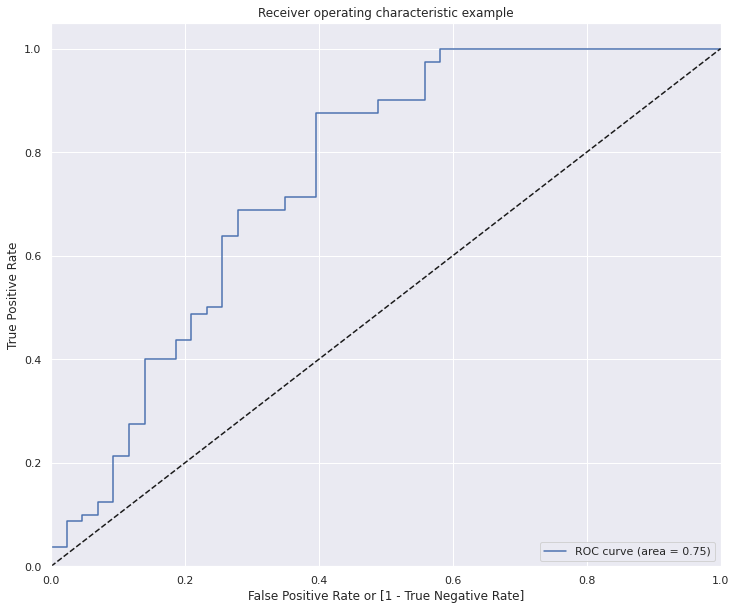

In [101]:
from sklearn import metrics
# Predicted probability
y_val_pred_proba=xg_model_opt.predict_proba(X_val)[:,1]
# Plot the ROC curve
draw_roc(y_val, y_val_pred_proba)

In [107]:
sub=pd.read_csv("sample_submission_49d68Cx.csv")
sub.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [117]:
test_preds=xg_model_opt.predict(test_scl.to_numpy())
sub["Loan_Status"]=pd.Series(test_preds)
sub["Loan_Status"]=sub["Loan_Status"].replace({1:"Y",0:"N"})
sub.to_csv("xgb_result.csv",index=None)

# Dealing with imbalance Data

## Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Define Oversampling Strategy
oversample=RandomOverSampler(sampling_strategy="minority")